In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
data = sns.get_dataset_names()
print(data)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [38]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total,51.0,15.790196,4.122002,5.900,12.7500,15.600,18.500,23.900
speeding,51.0,4.998196,2.017747,1.792,3.7665,4.608,6.439,9.450
alcohol,51.0,4.886784,1.729133,1.593,3.8940,4.554,5.604,10.038
not_distracted,51.0,13.573176,4.508977,1.760,10.4780,13.857,16.140,23.661
no_previous,51.0,14.004882,3.764672,5.900,11.3480,13.775,16.755,21.280
ins_premium,51.0,886.957647,178.296285,641.960,768.4300,858.970,1007.945,1301.520
ins_losses,51.0,134.493137,24.835922,82.750,114.6450,136.050,151.870,194.780


In [41]:
df.abbrev.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

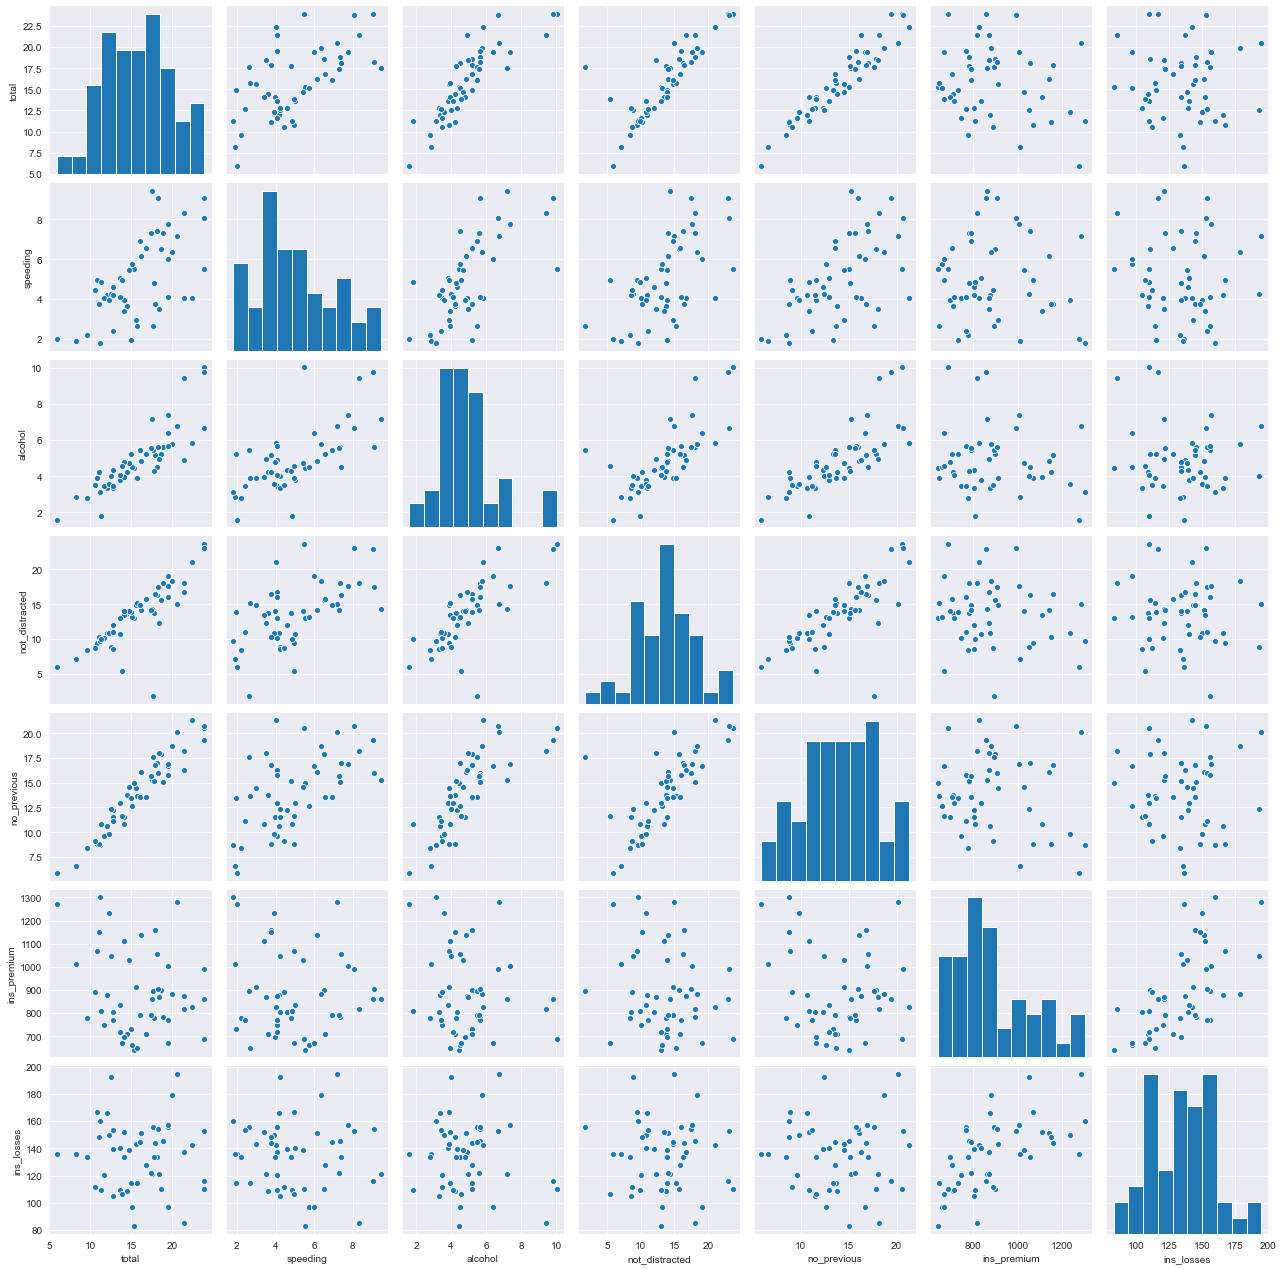

In [16]:
sns.set_style('darkgrid')
sns.pairplot(df)

<AxesSubplot:>

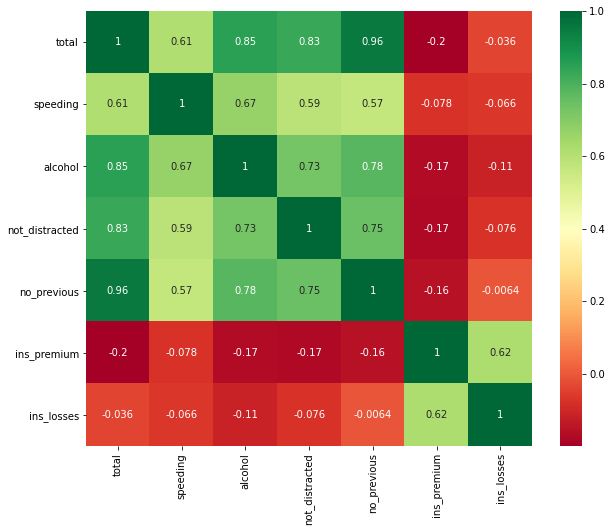

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [43]:
df1 = df.drop(['abbrev'], axis=1)
df1.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

In [45]:
X = df1.drop(['total'],axis=1)
y=df1['total']
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [46]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X = pd.DataFrame(X, columns=['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses'])
type(X)

pandas.core.frame.DataFrame

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
lasso_reg = Lasso()
selector = SelectFromModel(estimator=Lasso()).fit(X_train,y_train)
#lasso_reg.fit(X_train,y_train)

In [49]:
y_pred = lasso_reg.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8318259087852438


In [59]:
selected_feat = X_train.columns[selector.get_support()]
print(selected_feat)
print(selector.get_support())
print(selector.estimator_.coef_)

Index(['alcohol', 'not_distracted', 'no_previous'], dtype='object')
[False  True  True  True False False]
[ 0.          0.46687639  0.47686889  1.85777817 -0.         -0.        ]
